In [44]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import grad

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import pandas as pd


class MF(nn.Module):
    def __init__(self, n_coeffs, n_comps, n_pix):
        super(MF, self).__init__()
        self.cfs = nn.Parameter(torch.rand(n_coeffs, n_comps, requires_grad=True))
        self.cmps = nn.Parameter(torch.rand(n_comps, n_pix, requires_grad=True))

    def forward(self):
        return torch.matmul(self.cfs,self.cmps)


stack = np.load("stack.npy")
ncomps = 12

pca = PCA(n_components=ncomps).fit(stack)
coeffs = pca.transform(stack)
pca_decomp = pca.inverse_transform(coeffs)

print(pca_decomp.shape, stack.shape)
print(np.mean(np.square(pca_decomp - stack)))


stack_mean = np.mean(stack, axis=0)
target = torch.from_numpy(stack-stack_mean).float().to(device)
print("AAAA", torch.mean(target), torch.std(target))

ncoeffs = stack.shape[0]
npix = 160000

net = MF(ncoeffs, ncomps, npix)
net.to(device)

mse = nn.MSELoss(reduction='mean')
def unit_norm():
    torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device))
    
opt = optim.AdamW(net.parameters(), lr=1.0)
n_epoch  = 1000
for epoch in range(n_epoch):
    yhat = net()
    loss = mse(yhat, target) + 0.00001*torch.sum(torch.abs(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)))
    net.zero_grad() # need to clear the old gradients
    loss.backward()
    opt.step()
    if epoch % 100 == 0:
        print(epoch, mse(yhat, target).item(), torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)).item())

print(torch.norm(net.cmps, dim=1))
print(torch.sum(torch.norm(net.cmps, dim=1)))
      
opt = optim.AdamW(net.parameters(), lr=0.1)
n_epoch  = 1000
for epoch in range(n_epoch):
    yhat = net()
    #loss = mse(yhat, target) + 0.0001*torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device))
    loss = mse(yhat, target) + 0.00001*torch.sum(torch.abs(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)))

    net.zero_grad() # need to clear the old gradients
    loss.backward()
    opt.step()
    if epoch % 100 == 0:
        print(epoch, mse(yhat, target).item(), torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)).item())

print(torch.norm(net.cmps, dim=1))
print(torch.sum(torch.norm(net.cmps, dim=1)))

opt = optim.AdamW(net.parameters(), lr=0.01)
n_epoch  = 1000
for epoch in range(n_epoch):
    yhat = net()
    #loss = mse(yhat, target) + 0.1*torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device))
    loss = mse(yhat, target) + 0.00001*torch.sum(torch.abs(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)))

    net.zero_grad() # need to clear the old gradients
    loss.backward()
    opt.step()
    if epoch % 100 == 0:
        print(epoch, mse(yhat, target).item(), torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)).item())

print(torch.norm(net.cmps, dim=1))
print(torch.sum(torch.norm(net.cmps, dim=1)))

opt = optim.AdamW(net.parameters(), lr=0.001)
n_epoch  = 20000
for epoch in range(n_epoch):
    yhat = net()
    #loss = mse(yhat, target) + 0.1*torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device))
    loss = mse(yhat, target) + 0.00001*torch.sum(torch.abs(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)))

    net.zero_grad() # need to clear the old gradients
    loss.backward()
    opt.step()
    if epoch % 1000 == 0:
        print(epoch, mse(yhat, target).item(), torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)).item())

print(torch.norm(net.cmps, dim=1))
print(torch.sum(torch.norm(net.cmps, dim=1)))

cuda:0
(497, 160000) (497, 160000)
5.552699593096575e-05
AAAA tensor(7.6754e-13, device='cuda:0') tensor(0.0781, device='cuda:0')
0 9.514473915100098 2771.6533203125
100 0.0006794527871534228 117.87937927246094
200 0.0005985722527839243 78.96966552734375
300 0.0005989921046420932 58.80059814453125
400 0.000585939094889909 64.8113021850586
500 0.0005799370701424778 59.61408615112305
600 0.0005732231074944139 63.59129333496094
700 0.0005739856278523803 54.13326644897461
800 0.0005451531615108252 59.30535888671875
900 0.00051848404109478 62.543296813964844
tensor([ 3.7236,  2.4581,  0.8177, 47.1454,  2.3505,  2.0235,  2.5304,  4.0067,
         2.2755,  0.9383,  2.8935,  0.4023], device='cuda:0',
       grad_fn=<CopyBackwards>)
tensor(71.5655, device='cuda:0', grad_fn=<SumBackward0>)
0 0.0004982113023288548 222.2162628173828
100 0.00017754464352037758 32.43487548828125
200 0.0003271645400673151 27.99656867980957
300 0.00022124873066786677 30.309019088745117
400 0.00017753528663888574 31.90

In [45]:
opt = optim.AdamW(net.parameters(), lr=0.001)
n_epoch  = 20000
for epoch in range(n_epoch):
    yhat = net()
    #loss = mse(yhat, target) + 0.1*torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device))
    loss = mse(yhat, target) + 0.00001*torch.sum(torch.abs(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)))

    net.zero_grad() # need to clear the old gradients
    loss.backward()
    opt.step()
    if epoch % 1000 == 0:
        print(epoch, mse(yhat, target).item(), torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device)).item())

print(torch.norm(net.cmps, dim=1))
print(torch.sum(torch.norm(net.cmps, dim=1)))

0 5.670029713655822e-05 1.5612900257110596
1000 5.6354827393079177e-05 0.9040807485580444
2000 5.663030970026739e-05 0.9305579662322998
3000 5.743777728639543e-05 0.7329575419425964
4000 5.682079427060671e-05 0.6211843490600586
5000 5.6842804042389616e-05 0.582460880279541
6000 5.744554437114857e-05 0.38273972272872925
7000 5.654821143252775e-05 0.43514227867126465
8000 5.809982030768879e-05 0.4454498291015625
9000 5.7810400903690606e-05 0.30875593423843384
10000 5.6577613577246666e-05 0.2924121022224426
11000 5.64483561902307e-05 0.18267041444778442
12000 5.76102793274913e-05 0.11063414812088013
13000 5.718033935409039e-05 0.03514111042022705
14000 5.6913795560831204e-05 0.06044536828994751
15000 5.664020136464387e-05 0.06776714324951172
16000 5.7381330407224596e-05 -0.0463792085647583
17000 5.697770757251419e-05 0.18353837728500366
18000 5.688044257112779e-05 0.12403351068496704
19000 5.6170985772041604e-05 0.032201170921325684
tensor([0.9969, 0.9971, 1.0105, 1.0044, 0.9999, 0.9936, 

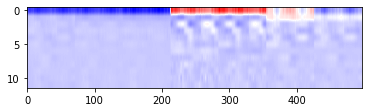

In [53]:
plt.imshow(coeffs.T, aspect=10, cmap='bwr')

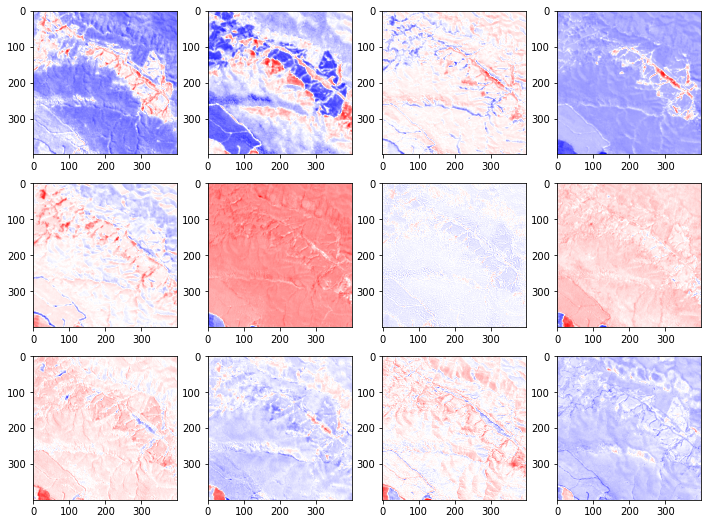

In [36]:
%matplotlib inline

pca_comps = pca.components_.reshape(12,400,400)


fig=plt.figure(figsize=(12, 9))
columns = 4
rows = 3

for i in range(12):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(pca_comps[i], cmap='bwr')

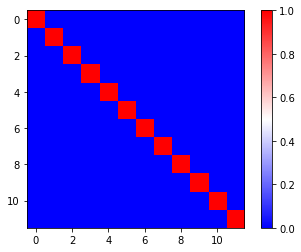

In [21]:
plt.imshow(pca.components_@pca.components_.T, cmap='bwr')
plt.colorbar()

In [29]:
torch.sum(torch.norm(net.cmps, dim=1) - torch.ones(12).to(device))

tensor(278.6743, device='cuda:0', grad_fn=<SumBackward0>)

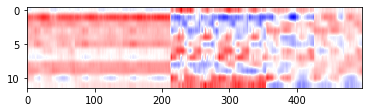

In [52]:
plt.imshow(net.cfs.detach().cpu().numpy().T, aspect=10, cmap='bwr')

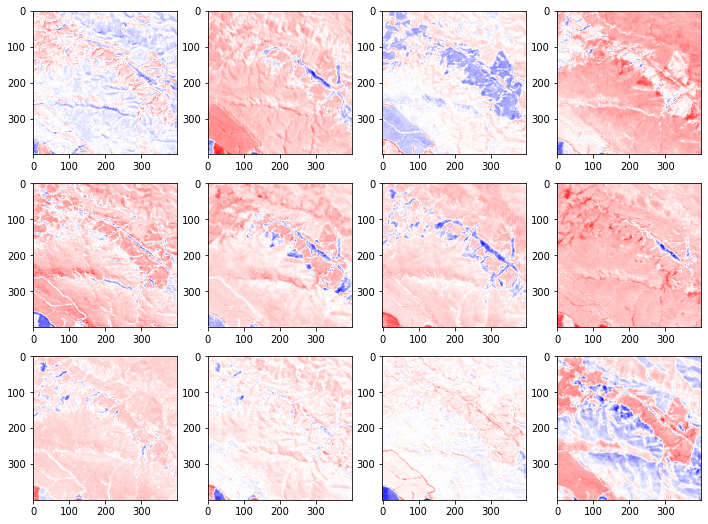

In [47]:
nn_comps = net.cmps.detach().cpu().numpy().reshape(12,400,400)


fig=plt.figure(figsize=(12, 9))
columns = 4
rows = 3

for i in range(12):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(nn_comps[i], cmap='bwr')

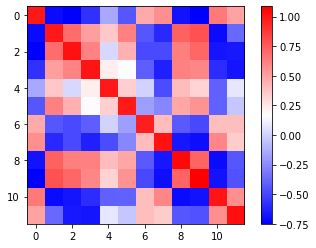

In [46]:
plt.imshow(net.cmps.detach().cpu().numpy()@net.cmps.detach().cpu().numpy().T, cmap='bwr')
plt.colorbar()